# Identifying Ethnicity in OpenSAFELY-TPP
This short report describes how ethnicity can be identified in the OpenSAFELY-TPP database, and the strengths and weaknesses of the methods. This is a living document that will be updated to reflect changes to the OpenSAFELY-TPP database and the patient records within.

## OpenSAFELY
OpenSAFELY is an analytics platform for conducting analyses on Electronic Health Records inside the secure environment where the records are held. This has multiple benefits: 

* We don't transport large volumes of potentially disclosive pseudonymised patient data outside of the secure environments for analysis
* Analyses can run in near real-time as records are ready for analysis as soon as they appear in the secure environment
* All infrastructure and analysis code is stored in GitHub repositories, which are open for security review, scientific review, and re-use

A key feature of OpenSAFELY is the use of study definitions, which are formal specifications of the datasets to be generated from the OpenSAFELY database. This takes care of much of the complex EHR data wrangling required to create a dataset in an analysis-ready format. It also creates a library of standardised and validated variable definitions that can be deployed consistently across multiple projects. 

The purpose of this report is to describe all such variables that relate to BMI, their relative strengths and weaknesses, in what scenarios they are best deployed. It will also describe potential future definitions that have not yet been implemented.

## Available Records
OpenSAFELY-TPP runs inside TPP’s data centre which contains the primary care records for all patients registered at practices using TPP’s SystmOne Clinical Information System. This data centre also imports external datasets from other sources, including A&E attendances and hospital admissions from NHS Digital’s Secondary Use Service, and death registrations from the ONS. More information on available data sources can be found within the OpenSAFELY documentation. 

In [1]:
from IPython.display import display, Markdown
from lib import *

pd.set_option('display.max_rows', 500)
pd.options.mode.chained_assignment = None 

In [2]:
### CONFIGURE OPTIONS HERE ###

# Import file
input_path = '../output/data/input.feather'

# Definitions
definitions = ['ethnicity_snomed_5', 'ethnicity_5']
other_vars = ['white_count', 'black_count', 'asian_count', 'other_count', 'mixed_count']

# Dates
date_min = '2019-01-01'
date_max = '2019-12-31'
time_delta = 'M'

# Null value – 0 or NA
null = [0,"0"]

# Covariates
demographic_covariates = ['age_band', 'sex', 'region', 'imd']
clinical_covariates = ['dementia', 'diabetes', 'hypertension', 'learning_disability']

In [3]:
df_clean = import_clean(input_path, definitions, other_vars, demographic_covariates, clinical_covariates, null, time_delta, dates=False)

## Results

### Count of Patients

In [4]:
patient_counts(df_clean, definitions, demographic_covariates, clinical_covariates)

ethnicity_snomed_5  ethnicity_5  \
group               subgroup                                                   
population          N                                      1000         1000   
                    with records                  705.0 (100.0)  750 (100.0)   
age_band            0-19                            80.0 (11.3)    75 (10.0)   
                    20-29                           90.0 (12.8)   100 (13.3)   
                    30-39                           90.0 (12.8)    95 (12.7)   
                    40-49                          105.0 (14.9)   100 (13.3)   
                    50-59                           90.0 (12.8)   100 (13.3)   
                    60-69                           75.0 (10.6)    90 (12.0)   
                    70-79                           85.0 (12.1)    90 (12.0)   
                    80+                             90.0 (12.8)   100 (13.3)   
sex                 F                              360.0 (51.1)   385 (51.3)   
                    M                              345.0 (48.9)   365 (48.7)   
region              East Midlands                    40.0 (5.7)     45 (6.0)   
                    East of England                  50.0 (7.1)     50 (6.7)   
                    London                          80.0 (11.3)    90 (12.0)   
                    North East                       60.0 (8.5)     55 (7.3)   
                    North West                       50.0 (7.1)     55 (7.3)   
                    South East                      95.0 (13.5)    95 (12.7)   
                    West Midlands                    50.0 (7.1)     55 (7.3)   
                    Yorkshire and the Humber         35.0 (5.0)     40 (5.3)   
imd                 100                            130.0 (18.4)   140 (18.7)   
                    200                            140.0 (19.9)   130 (17.3)   
                    300                            155.0 (22.0)   165 (22.0)   
                    400                            140.0 (19.9)   140 (18.7)   
                    500                            150.0 (21.3)   175 (23.3)   
dementia            False                          700.0 (99.3)   745 (99.3)   
                    True                              5.0 (0.7)      5 (0.7)   
diabetes            False                          700.0 (99.3)   740 (98.7)   
                    True                              5.0 (0.7)     10 (1.3)   
hypertension        False                          700.0 (99.3)   740 (98.7)   
                    True                                  - (-)     10 (1.3)   
learning_disability False                          700.0 (99.3)   745 (99.3)   
                    True                              5.0 (0.7)      5 (0.7)   

                                                 all_filled  
group               subgroup                                 
population          N                                  1000  
                    with records              525.0 (100.0)  
age_band            0-19                        55.0 (10.5)  
                    20-29                       70.0 (13.3)  
                    30-39                       75.0 (14.3)  
                    40-49                       75.0 (14.3)  
                    50-59                       65.0 (12.4)  
                    60-69                       55.0 (10.5)  
                    70-79                       65.0 (12.4)  
                    80+                         65.0 (12.4)  
sex                 F                          275.0 (52.4)  
                    M                          250.0 (47.6)  
region              East Midlands                30.0 (5.7)  
                    East of England              40.0 (7.6)  
                    London                      65.0 (12.4)  
                    North East                   45.0 (8.6)  
                    North West                   40.0 (7.6)  
                    South East                  60.0 (11.4)  
    

### Count of Missings

In [5]:
patient_counts(df_clean, definitions, demographic_covariates, clinical_covariates, missing=True)

ethnicity_snomed_5  \
group               subgroup                                      
population          N                                      1000   
                    missing records               295.0 (100.0)   
age_band            0-19                             25.0 (8.5)   
                    20-29                           40.0 (13.6)   
                    30-39                           30.0 (10.2)   
                    40-49                           35.0 (11.9)   
                    50-59                           45.0 (15.3)   
                    60-69                           45.0 (15.3)   
                    70-79                           30.0 (10.2)   
                    80+                             45.0 (15.3)   
sex                 F                              145.0 (49.2)   
                    M                              145.0 (49.2)   
region              East Midlands                    20.0 (6.8)   
                    East of England                  15.0 (5.1)   
                    London                          35.0 (11.9)   
                    North East                       20.0 (6.8)   
                    North West                       20.0 (6.8)   
                    South East                      45.0 (15.3)   
                    West Midlands                    15.0 (5.1)   
                    Yorkshire and the Humber         20.0 (6.8)   
imd                 100                             60.0 (20.3)   
                    200                             45.0 (15.3)   
                    300                             70.0 (23.7)   
                    400                             45.0 (15.3)   
                    500                             75.0 (25.4)   
dementia            False                          290.0 (98.3)   
                    True                                  - (-)   
diabetes            False                          290.0 (98.3)   
                    True                                  - (-)   
hypertension        False                          290.0 (98.3)   
                    True                                  - (-)   
learning_disability False                          290.0 (98.3)   
                    True                                  - (-)   

                                                ethnicity_5   all_missing  
group               subgroup                                               
population          N                                  1000          1000  
                    missing records           250.0 (100.0)  70.0 (100.0)  
age_band            0-19                        35.0 (14.0)   10.0 (14.3)  
                    20-29                       30.0 (12.0)   10.0 (14.3)  
                    30-39                       25.0 (10.0)     5.0 (7.1)  
                    40-49                       35.0 (14.0)   10.0 (14.3)  
                    50-59                       40.0 (16.0)   15.0 (21.4)  
                    60-69                       25.0 (10.0)   10.0 (14.3)  
                    70-79                       25.0 (10.0)         - (-)  
                    80+                         35.0 (14.0)   15.0 (21.4)  
sex                 F                          125.0 (50.0)   40.0 (57.1)  
                    M                          125.0 (50.0)   30.0 (42.9)  
region              East Midlands                15.0 (6.0)         - (-)  
                    East of England              20.0 (8.0)         - (-)  
                    London                      25.0 (10.0)   10.0 (14.3)  
                    North East                   20.0 (8.0)   10.0 (14.3)  
                    North West                   20.0 (8.0)     5.0 (7.1)  
                    South East                  45.0 (18.0)   15.0 (21.4)  
                    West Midlands                10.0 (4.0)         - (-)  
                    Yorkshire and the Humber     15.0 (6.0)         - (-)  
imd                 100    

### Count by Category

In [6]:
patient_counts(df_clean, definitions, demographic_covariates, clinical_covariates, categories=True)

ethnicity_snomed_5_1  \
group               subgroup                                        
population          with records                    195.0 (100.0)   
age_band            0-19                              20.0 (10.3)   
                    20-29                             30.0 (15.4)   
                    30-39                             20.0 (10.3)   
                    40-49                             30.0 (15.4)   
                    50-59                             25.0 (12.8)   
                    60-69                             25.0 (12.8)   
                    70-79                             25.0 (12.8)   
                    80+                               20.0 (10.3)   
sex                 F                                110.0 (56.4)   
                    M                                 90.0 (46.2)   
region              East Midlands                      15.0 (7.7)   
                    East of England                    15.0 (7.7)   
                    London                            25.0 (12.8)   
                    North East                         15.0 (7.7)   
                    North West                         15.0 (7.7)   
                    South East                        25.0 (12.8)   
                    West Midlands                      10.0 (5.1)   
                    Yorkshire and the Humber           10.0 (5.1)   
imd                 100                               30.0 (15.4)   
                    200                               40.0 (20.5)   
                    300                               45.0 (23.1)   
                    400                               30.0 (15.4)   
                    500                               45.0 (23.1)   
dementia            False                           195.0 (100.0)   
                    True                                    - (-)   
diabetes            False                           195.0 (100.0)   
                    True                                    - (-)   
hypertension        False                           195.0 (100.0)   
                    True                                    - (-)   
learning_disability False                           195.0 (100.0)   
                    True                                    - (-)   

                                             ethnicity_snomed_5_2  \
group               subgroup                                        
population          with records                    215.0 (100.0)   
age_band            0-19                              30.0 (14.0)   
                    20-29                              20.0 (9.3)   
                    30-39                             30.0 (14.0)   
                    40-49                             35.0 (16.3)   
                    50-59                             25.0 (11.6)   
                    60-69                              20.0 (9.3)   
                    70-79                             30.0 (14.0)   
                    80+                               25.0 (11.6)   
sex                 F                                110.0 (51.2)   
                    M                                105.0 (48.8)   
region              East Midlands                      10.0 (4.7)   
                    East of England                    15.0 (7.0)   
                    London                             20.0 (9.3)   
                    North East                         20.0 (9.3)   
                    North West                         15.0 (7.0)   
                    South East                        30.0 (14.0)   
                    West Midlands                      15.0 (7.0)   
                    Yorkshire and the Humber           20.0 (9.3)   
imd                 100                               40.0 (18.6)   
                    200                               40.0 (18.6)   
                    300                               50.0 (23.3)   
                    400                   

### Overlapping Definitions
Idea: Use an upset plot

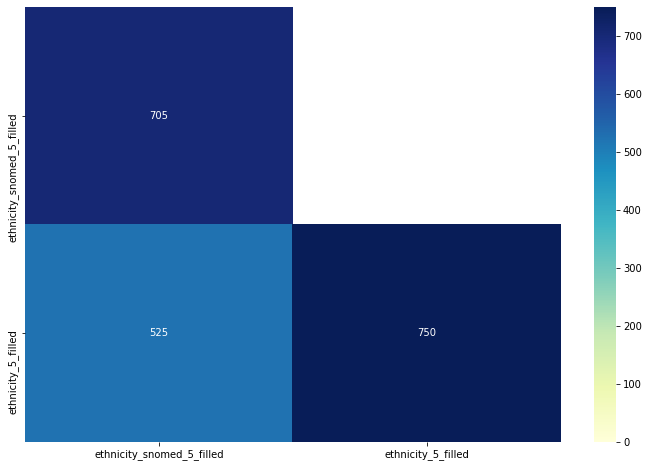

In [7]:
display_heatmap(df_clean, definitions)

### Latest vs. Most Common

In [8]:
latest_common_comparison(df_clean, definitions, other_vars)

,matching (n=245.0),not_matching (n=880.0)
ethnicity_snomed_5,,
1,145.0,170.0
2,45.0,315.0
3,15.0,125.0
4,20.0,155.0
5,20.0,115.0


,white_count (n=555.0),black_count (n=140.0),asian_count (n=135.0),other_count (n=145.0),mixed_count (n=150.0)
ethnicity_snomed_5,,,,,
1,145.0,45.0,40.0,40.0,45.0
2,170.0,45.0,45.0,55.0,45.0
3,85.0,15.0,15.0,10.0,15.0
4,90.0,20.0,20.0,20.0,25.0
5,65.0,15.0,15.0,20.0,20.0


,matching (n=255.0),not_matching (n=945.0)
ethnicity_5,,
1,135.0,135.0
2,30.0,210.0
3,30.0,200.0
4,30.0,195.0
5,30.0,205.0


,white_count (n=575.0),black_count (n=160.0),asian_count (n=155.0),other_count (n=155.0),mixed_count (n=155.0)
ethnicity_5,,,,,
1,135.0,30.0,35.0,35.0,35.0
2,120.0,30.0,30.0,25.0,35.0
3,105.0,35.0,30.0,35.0,25.0
4,100.0,30.0,35.0,30.0,30.0
5,115.0,35.0,25.0,30.0,30.0


### State Change

In [9]:
state_change(df_clean, other_vars, definitions)

,white_count,black_count,asian_count,other_count,mixed_count
ethnicity_snomed_5,,,,,
1 (n = 155),155,25,20,20,20
2 (n = 15),160,15,15,20,15
3 (n = 10),80,10,10,-,10
4 (n = 5),90,10,15,5,15
5 (n = 10),65,10,10,15,10


,white_count,black_count,asian_count,other_count,mixed_count
ethnicity_5,,,,,
1 (n = 135.0),135.0,15.0,10.0,15.0,15.0
2 (n = 20.0),120.0,20.0,15.0,10.0,25.0
3 (n = 20.0),105.0,20.0,20.0,15.0,10.0
4 (n = 15.0),105.0,10.0,15.0,15.0,15.0
5 (n = 10.0),115.0,15.0,10.0,10.0,10.0
